# Capstone Webscrapping using BeautifulSoup

This is to scrap the movies detail from IMDB websites for 2019 movies. Informations retrieved from websites are:
1. Title : the title of the movie
2. Genre : the genre of the movie
3. Runtime : the runtime of the movie
4. IMDB Rating : the imdb rating of the movie
5. Meta Score : the rating score from metacritic.com
6. Votes : the number of votes for the movie
7. Synopsis : synopsis of the movie


In [1]:
import requests

url_get = requests.get('http://imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('div', attrs={"class": "lister-list"})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt1312171">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt1312171/">
    <img alt="The Umbrella Academy" class="loadlate" data-tconst="tt1312171" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNzA5MjkwYzMtNGY2MS00YWRjLThkNTktOTNmMzdlZjE3Y2IxXkEyXkFqcGdeQXVyMjkwMzMxODg@._V1_UX67_CR


Do the scrapping process here (please change this markdown with your explanation)

In [6]:
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [7]:
temp = [] #initiating a tuple
tr = table.find_all('div', attrs={"class": "lister-item mode-advanced"})
for i in range(0, len(tr)):
    row = table.find_all('div', attrs={"class": "lister-item mode-advanced"})[i]
    title = row.h3.a.string.strip()
        
    if row.find('span', attrs={'class': 'genre'}) == None : 
        genre = None
    else: genre = row.find('span', attrs={'class': 'genre'}).string.strip()
            
    if row.find('span', attrs={'name': 'nv'}) == None :
        votes = None
    else: votes = row.find('span', attrs={'name': 'nv'}).string.replace(',','').strip()
        
    if row.find('div', attrs={'class': "inline-block ratings-imdb-rating"}) == None :
        imdb_rating = None
    else: imdb_rating = row.find('div', attrs={'class': "inline-block ratings-imdb-rating"}).strong.string.strip()
        
    if row.find('span', attrs={'class': 'runtime'}) == None :
        runtime = None
    else: runtime = row.find('span', attrs={'class': 'runtime'}).string.strip()
        
    if row.find('div', attrs={'class': "inline-block ratings-metascore"}) == None : 
        meta_score = None
    else: 
        meta_score = row.find('div', attrs={'class': "inline-block ratings-metascore"}).span.string.strip()
    
    if row.find_all('p', attrs={'class':'text-muted'})[1] == None:
        synopsis = None
    else:
        synopsis = remove_html_tags(str(row.find_all('p', attrs={'class':'text-muted'})[1])).strip()
        
    temp.append([title, genre, runtime, imdb_rating, meta_score, votes, synopsis])

    #scrapping process
    
temp 

[['The Umbrella Academy',
  'Action, Adventure, Comedy',
  '60 min',
  '8.0',
  None,
  '112893',
  'A family of former child heroes, now grown apart, must reunite to continue to protect the world.'],
 ['The Boys',
  'Action, Comedy, Crime',
  '60 min',
  '8.7',
  None,
  '157060',
  'A group of vigilantes set out to take down corrupt superheroes who abuse their superpowers.'],
 ['Knives Out',
  'Comedy, Crime, Drama',
  '130 min',
  '7.9',
  '82',
  '360810',
  'A detective investigates the death of a patriarch of an eccentric, combative family.'],
 ['Watchmen',
  'Action, Drama, Mystery',
  '60 min',
  '8.1',
  None,
  '74598',
  'Set in an alternate history where masked vigilantes are treated as outlaws, Watchmen embraces the nostalgia of the original groundbreaking graphic novel of the same name, while attempting to break new ground of its own.'],
 ['Euphoria',
  'Drama',
  '55 min',
  '8.3',
  None,
  '44587',
  'A look at life for a group of high school students as they grapple w

Put the array into dataframe

In [8]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

df = pd.DataFrame(temp, columns = ('title', 'genre', 'runtime', 'imdb_rating', 'meta_score', 'votes', 'synopsis'))
df.head()

,title,genre,runtime,imdb_rating,meta_score,votes,synopsis
0,The Umbrella Academy,"Action, Adventure, Comedy",60 min,8.0,None,112893,"A family of former child heroes, now grown apart, must reunite to continue to protect the world."
1,The Boys,"Action, Comedy, Crime",60 min,8.7,None,157060,A group of vigilantes set out to take down corrupt superheroes who abuse their superpowers.
2,Knives Out,"Comedy, Crime, Drama",130 min,7.9,82,360810,"A detective investigates the death of a patriarch of an eccentric, combative family."
3,Watchmen,"Action, Drama, Mystery",60 min,8.1,None,74598,"Set in an alternate history where masked vigilantes are treated as outlaws, Watchmen embraces th..."
4,Euphoria,Drama,55 min,8.3,None,44587,"A look at life for a group of high school students as they grapple with issues of drugs, sex and..."


Do the data cleaning here (please change this markdown with your explanation)

In [9]:
df[['imdb_rating', 'meta_score']] = df[['imdb_rating', 'meta_score']].astype('float64')
df['votes'] = df['votes'].astype('int64')
df.meta_score = df.meta_score.fillna('')
df.runtime = df.runtime.fillna('')

In [10]:
df = df.sort_values(['imdb_rating'], ascending=False).reset_index().drop('index', axis=1)
df.index = df.index+1
df.head()

,title,genre,runtime,imdb_rating,meta_score,votes,synopsis
1,Chernobyl,"Drama, History, Thriller",330 min,9.4,,485994,"In April 1986, an explosion at the Chernobyl nuclear power plant in the Union of Soviet Socialis..."
2,The Mandalorian,"Action, Adventure, Sci-Fi",40 min,8.7,,182018,"The travels of a lone bounty hunter in the outer reaches of the galaxy, far from the authority o..."
3,The Boys,"Action, Comedy, Crime",60 min,8.7,,157060,A group of vigilantes set out to take down corrupt superheroes who abuse their superpowers.
4,Gisaengchung,"Comedy, Drama, Thriller",132 min,8.6,96,457919,Greed and class discrimination threaten the newly formed symbiotic relationship between the weal...
5,What We Do in the Shadows,"Comedy, Fantasy, Horror",30 min,8.5,,28741,"A look into the daily (or rather, nightly) lives of three vampires, who've lived together for ov..."


Do the data visualisation here. (please change this markdown with your explanation)

<AxesSubplot:xlabel='title'>

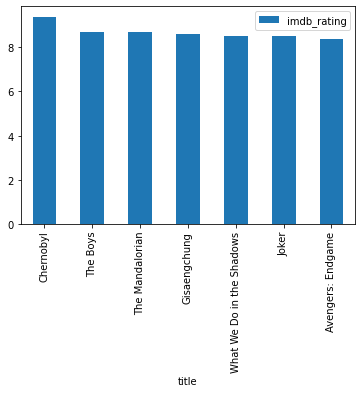

In [11]:
df.groupby(['title']).sum()[['imdb_rating']].sort_values('imdb_rating', ascending=False).head(7).plot.bar()

<AxesSubplot:xlabel='genre'>

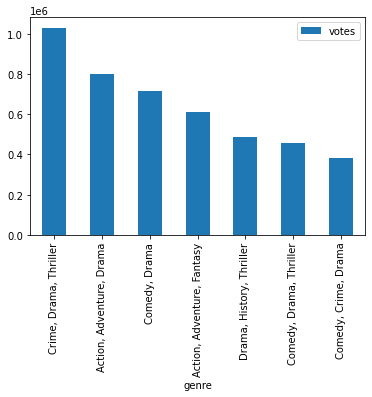

In [12]:
df.groupby(['genre']).sum()[['votes']].sort_values('votes', ascending=False).head(7).plot.bar()

Conclusion:
1. **Chernobyl** is the highest rated movie in 2019 with rating 9.4
2. **Crime, Drama, Thriller** is the most voted genre in 2019

then put your flask dashboard link here too.

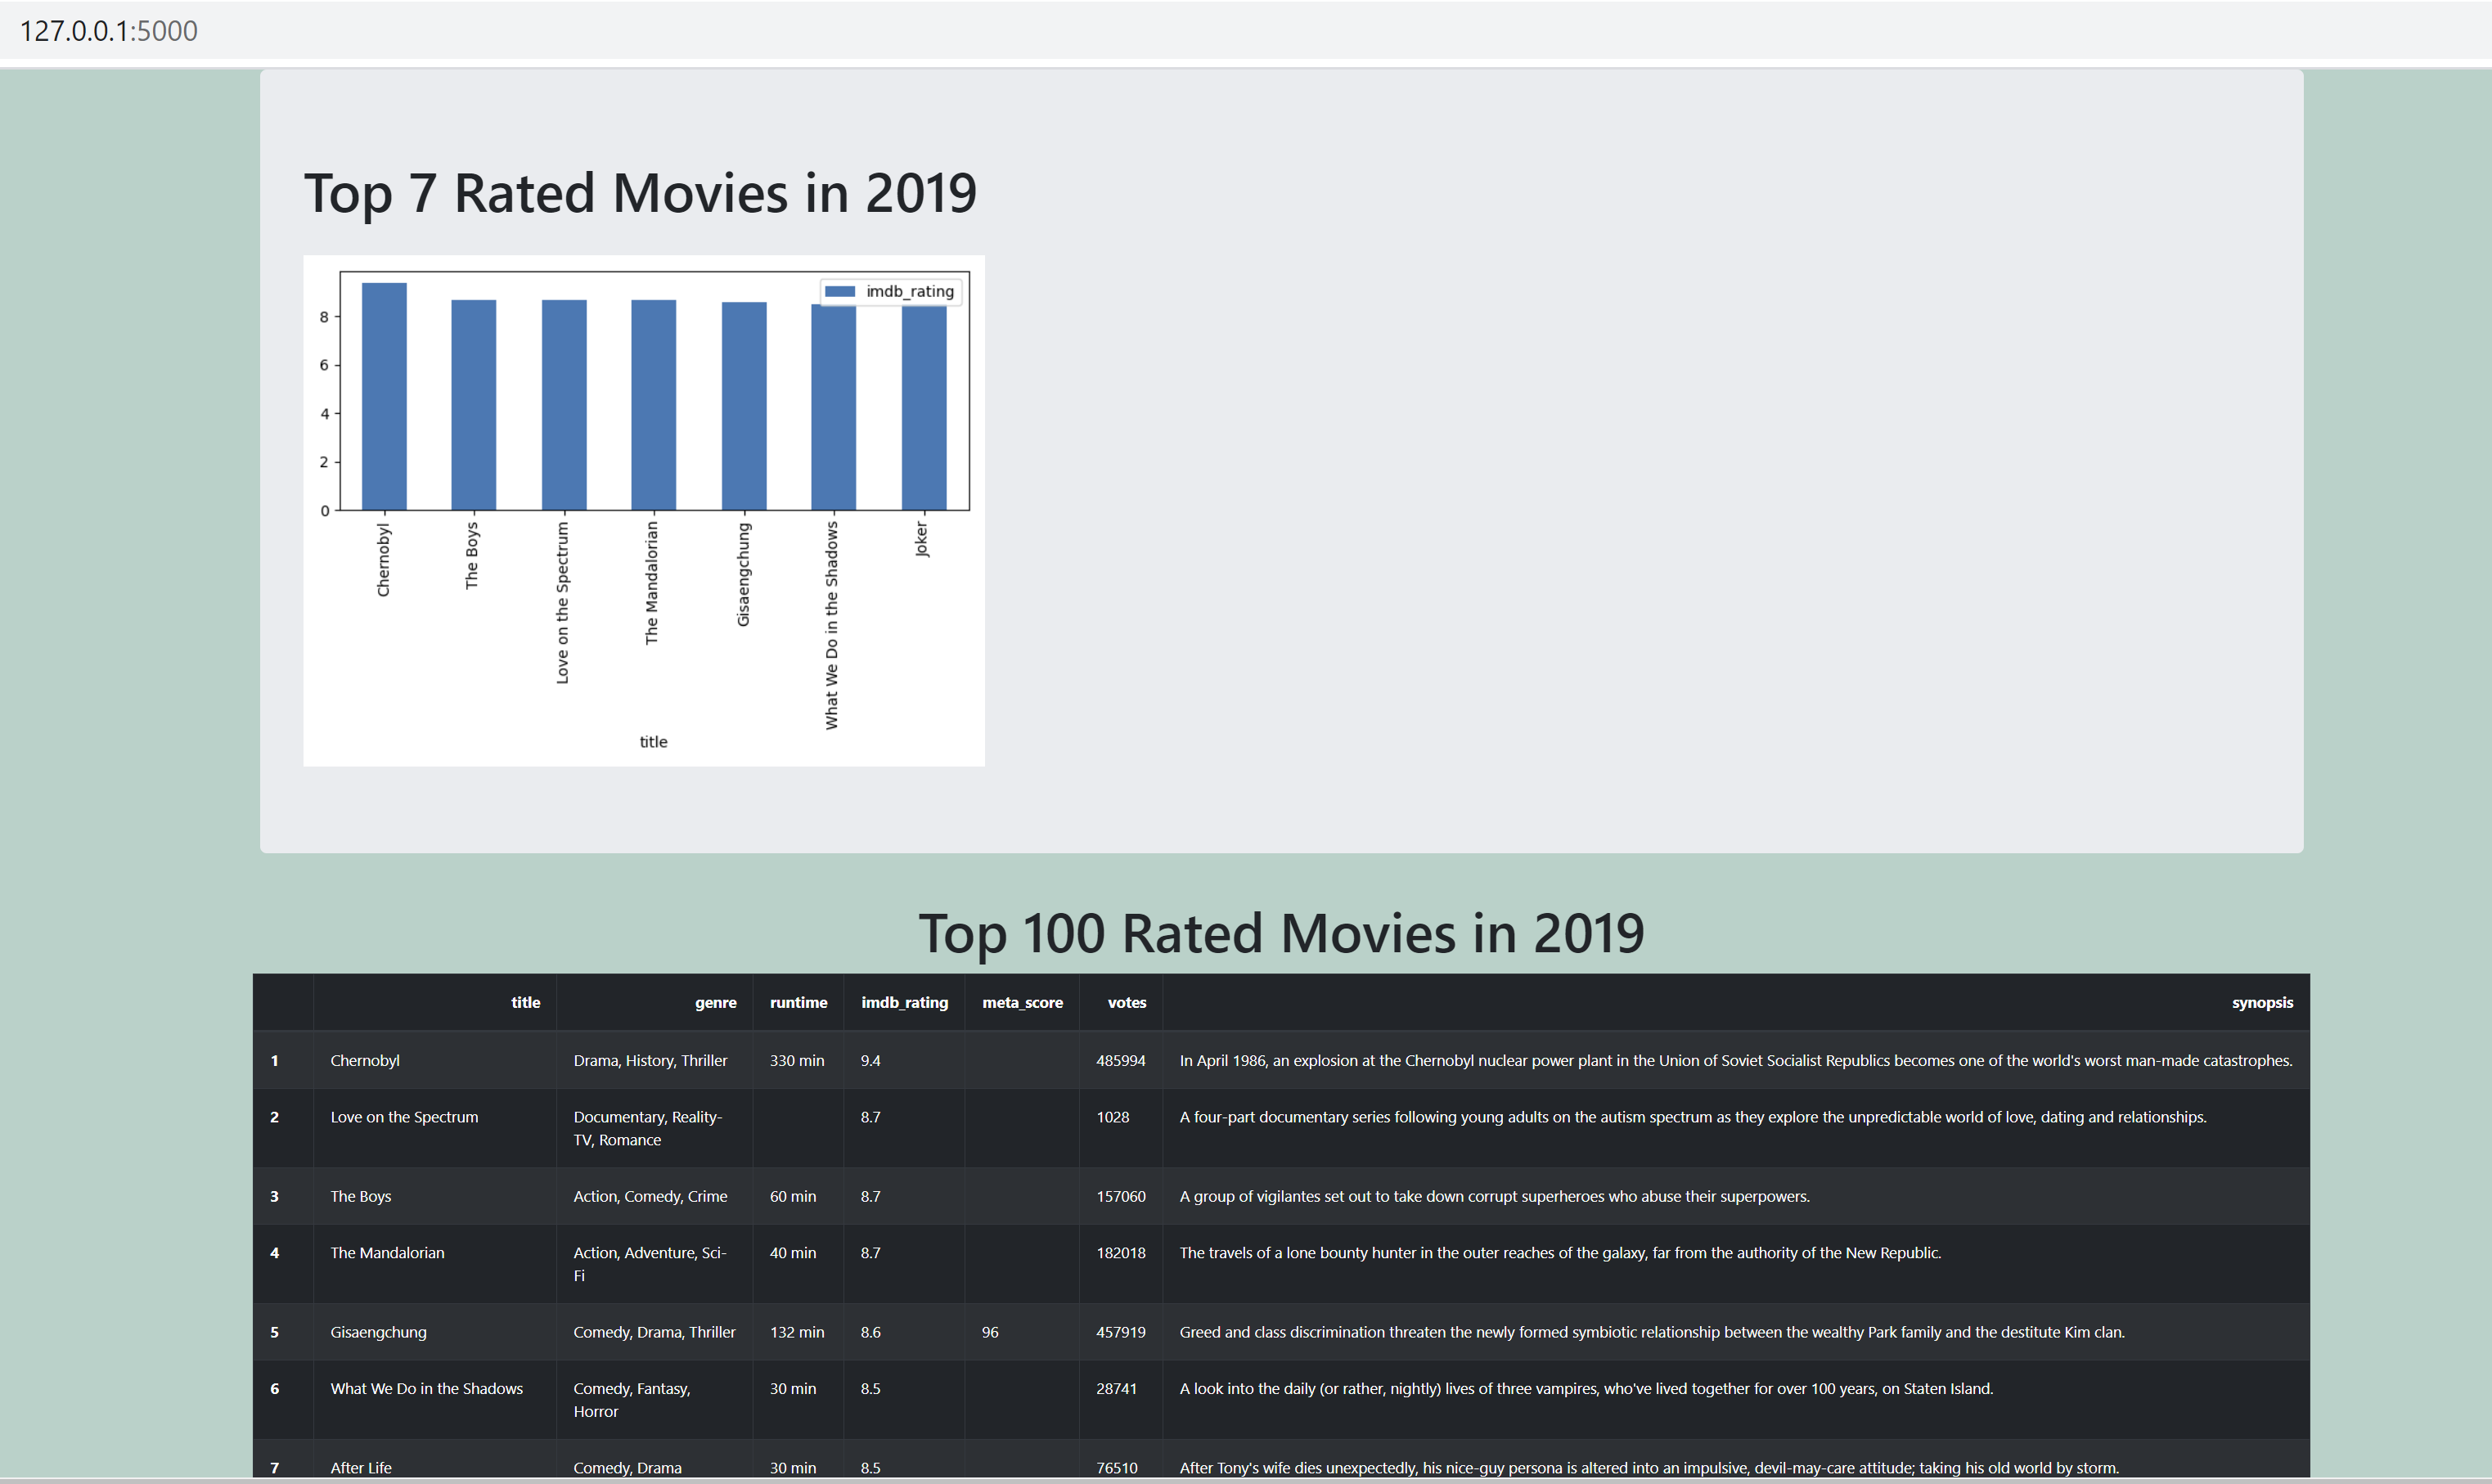